In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r"boston.csv")
df.head(8)

,Sr,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [3]:
df.rename(columns={"medv":"Price"},inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sr       506 non-null    int64  
 1   crim     506 non-null    float64
 2   zn       506 non-null    float64
 3   indus    506 non-null    float64
 4   chas     506 non-null    int64  
 5   nox      506 non-null    float64
 6   rm       506 non-null    float64
 7   age      506 non-null    float64
 8   dis      506 non-null    float64
 9   rad      506 non-null    int64  
 10  tax      506 non-null    int64  
 11  ptratio  506 non-null    float64
 12  black    506 non-null    float64
 13  lstat    506 non-null    float64
 14  Price    506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.describe()

,Sr,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


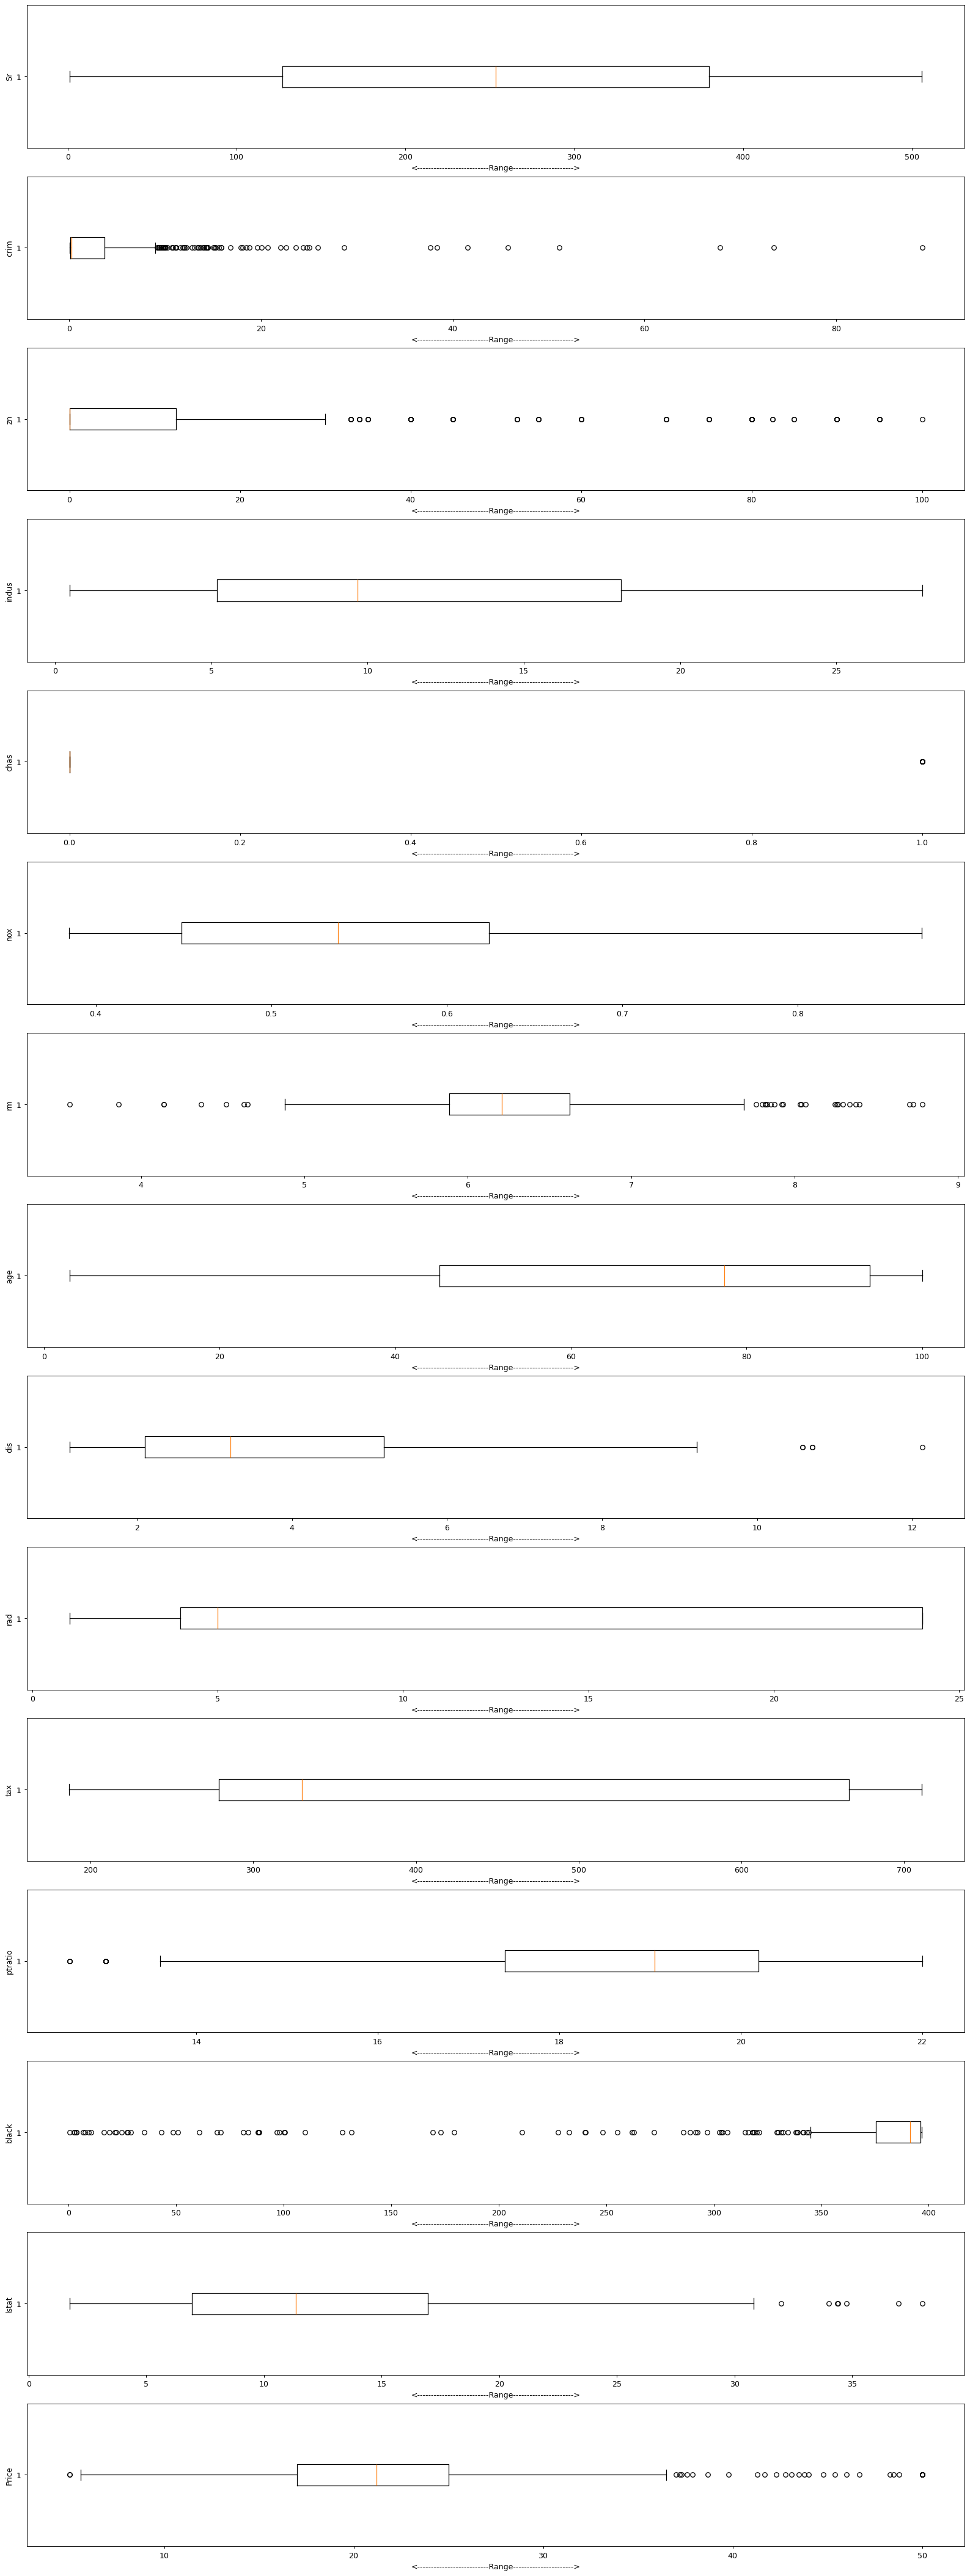

In [6]:
fig, ax = plt.subplots(15,1,dpi=90,figsize = (22,60))
j = 0
for i in df.columns:
    ax[j].boxplot(df[i],vert = False)
    ax[j].set_ylabel(i)
    ax[j].set_xlabel("<--------------------------Range---------------------->")
    j+=1

In [7]:
#data cleaning using Z score ans IQR
mean = np.mean(df["crim"])
st_dev = np.std(df["crim"])
thres = 3
out = []
for i in df["crim"]:
    z = (1-mean)/st_dev
    if(z>3):
        out.append(i)
print(out,len(out))


[] 0


In [8]:
#Quartiles 

q1,q3 = np.percentile(df["crim"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = df[(df["crim"]>=low) & (df["crim"]<= up)]


In [9]:
q1,q3 = np.percentile(clean_data["zn"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["zn"]>=low) & (clean_data["zn"]<= up)]


In [10]:
q1,q3 = np.percentile(clean_data["indus"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["indus"]>=low) & (clean_data["indus"]<= up)]


In [11]:
q1,q3 = np.percentile(clean_data["chas"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["chas"]>=low) & (clean_data["chas"]<= up)]


In [12]:
q1,q3 = np.percentile(clean_data["nox"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["nox"]>=low) & (clean_data["nox"]<= up)]


In [13]:
q1,q3 = np.percentile(clean_data["rm"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["rm"]>=low) & (clean_data["rm"]<= up)]


In [14]:
q1,q3 = np.percentile(clean_data["age"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["age"]>=low) & (clean_data["age"]<= up)]


In [15]:
q1,q3 = np.percentile(clean_data["dis"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["dis"]>=low) & (clean_data["dis"]<= up)]


In [16]:
q1,q3 = np.percentile(clean_data["rad"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["rad"]>=low) & (clean_data["rad"]<= up)]


In [17]:
q1,q3 = np.percentile(clean_data["tax"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["tax"]>=low) & (clean_data["tax"]<= up)]


In [18]:
q1,q3 = np.percentile(clean_data["ptratio"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["ptratio"]>=low) & (clean_data["ptratio"]<= up)]


In [19]:
q1,q3 = np.percentile(clean_data["black"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["black"]>=low) & (clean_data["black"]<= up)]


In [20]:
q1,q3 = np.percentile(clean_data["lstat"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["lstat"]>=low) & (clean_data["lstat"]<= up)]


In [21]:
q1,q3 = np.percentile(clean_data["Price"],[25,75])
k = 1
#Inter Quartile Range
iqr = q3-q1

low = q1-(k*iqr)
up = q3+(k*iqr)

clean_data = clean_data[(clean_data["Price"]>=low) & (clean_data["Price"]<= up)]


In [22]:
clean_data

,Sr,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
13,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
14,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
15,16,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1
497,498,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,499,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5


In [23]:
clean_data.shape

(170, 15)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
x = clean_data.iloc[:,1:14]
y = clean_data.iloc[:,-1]
x.shape

(170, 13)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/5)
y_test.shape

(34,)

In [27]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
pred = reg.predict(x_test)
pred.shape

(34,)

In [29]:
print(reg.score(x,y),reg.coef_)

0.6824334603788687 [-3.16903275e-01 -1.92712303e-02  3.63822007e-02 -2.93098879e-14
 -1.09326996e+01  4.32189740e+00 -3.63900861e-02 -8.10207625e-01
  3.17964649e-01 -1.18906130e-02 -2.83344604e-01  5.46893118e-03
 -2.22781063e-01]


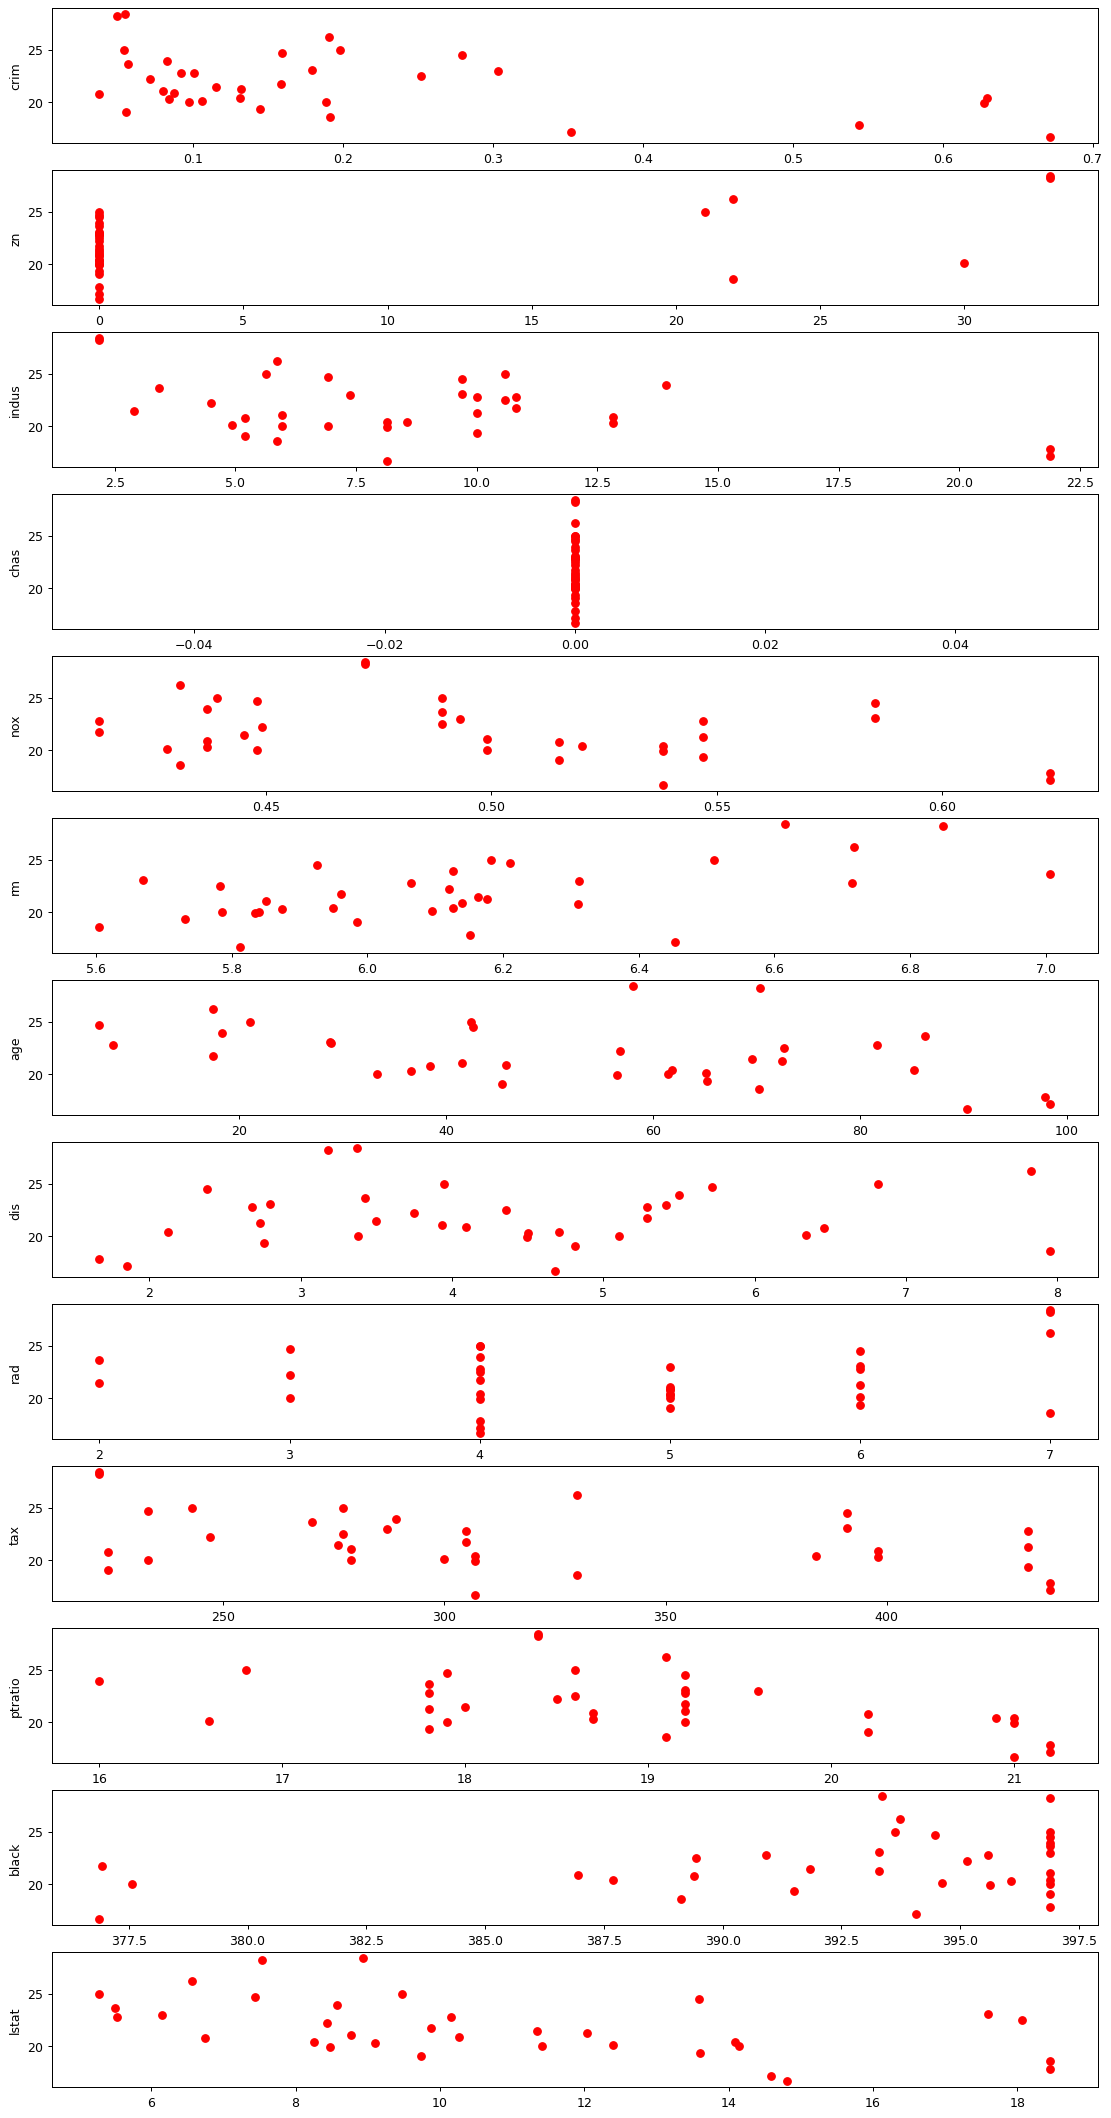

In [30]:
fig,ax = plt.subplots(13,1,dpi = 90,figsize = (15,30))
j = 0
for i in x_test.columns:
    ax[j].scatter(x_test[i],y_test,color = "red")
    ax[j].set_ylabel(i)
    # ax[j].plot(x_test[i],pred,color = "Blue")
    j+=1